<p>
    
<center>
     <img src="https://media.giphy.com/media/vJ8mos0yx971u/giphy.gif" alt="Simply Easy Learning">
</center>

## The dish-washing issue again... but with different data

Leonard, Howard, Rajesh, and Sheldon need to decide who washes the dishes every night. As you may remember, to make that decision, they select whoever gets the longest stick (this is, randomly) everyt ime. This time, instead of theoretically deciding how many consecutive nights not washing the dishes are needed to be suspicious about Sheldon not having to do the dishes, we have the actual frequency data: the washing frequencies for 40 nights for each of the 4 flatmates:


In [1]:
observed.washes<-c(2,13,11,14)#the data
names(observed.washes) <- c("Sheldon","Leonard","Howard","Rajesh")#assign a name for every vector
sum(observed.washes)#check that are 40 days in total
observed.washes#print the data

[1] 40

Sheldon Leonard  Howard  Rajesh 
      2      13      11      14

The question is whether these washing frequencies are distributed evenly between the four friends. Let's start plotting those frequencies:

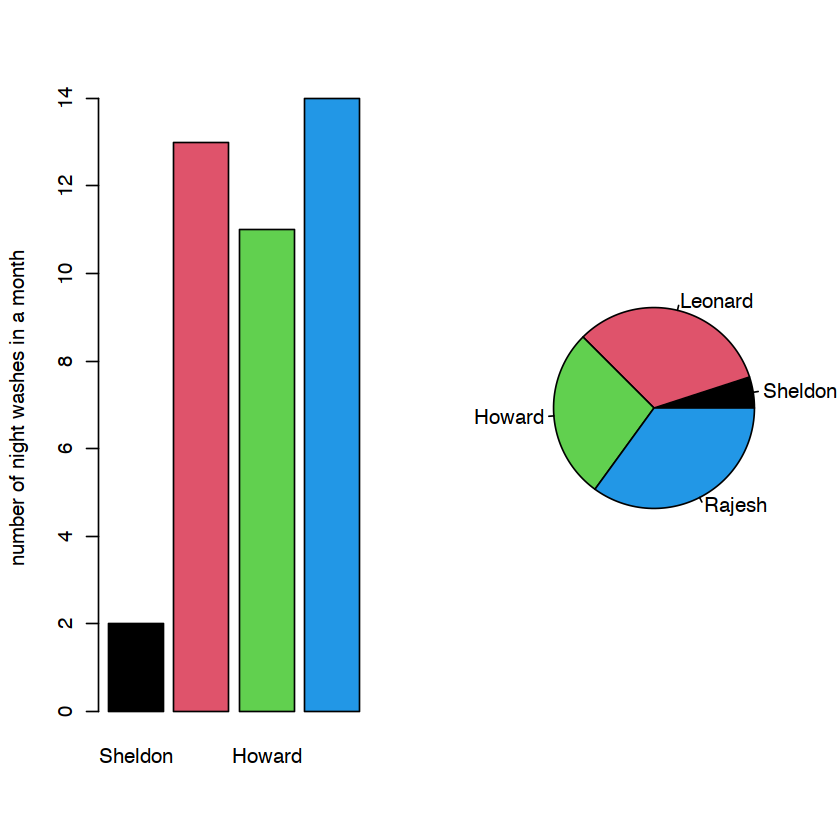

In [4]:
#always start with a figure
#let's have a couple of them here: a bar and a pie figure
par(mfrow = c(1, 2))
barplot(observed.washes,ylab="number of night washes in a month",col=c(1,2,3,4))
pie(observed.washes,col=c(1,2,3,4))#pie charts are not often used, bars are better particularly when many values
#in this case, still ok to see that while Sheldon

## The Chi-Square distribution

How do we decide if washing the dishes is fairly distributed among the 4 mates? In other words, how do we decide if the dish washing distribution of frequencies is due to chance? Instead of the binomial distribution, in this case the chi-square formula provides an elegant way of aiding us in such a decision:
<p>
$${
\chi ^{2}=\sum_{i}^{n}\frac{\left ( observed{_i}-expected{_i}\right )^{2}}{observed{_i}}
}$$
<p>  
    
Just understand the logic of the formula, and why not, think if you can give a better way of estimating it. This is just one way to measuring the differences between observed and expected washing frequencies, and it has been using for more than 100 years after Karl Pearson. The more the observed and expected frequencies differ the larger the chi-square value is. And, which are the expected frequencies for Leonard, Howard, Rajesh, and Sheldon? Well, if all were fair, you will agree that the 40 nigths would be evenly distributed for the four mates, thus it should 10 washing times for every one, do you agree? 
    
<p>
$${    
\chi ^{2}=\frac{\left ( 2-10 \right )^2}{10}+\frac{\left ( 13-10 \right )^2}{10}+\frac{\left ( 11-10 \right )^2}{10}+\frac{\left ( 14-10 \right )^2}{10}= 9
}$$
<p> 
    
Of course, we can tell R do it by passing the command `chisq.test()` over our data `observed.washes`:    

In [5]:
chisq.test(observed.washes)
a<-c(10,10,10,10) 
b<-c(9,11,10,10) 
c<-c(8,12,10,10) 
d<-c(0,0,0,40) 
chisq.test(a)
chisq.test(b)
chisq.test(c)
chisq.test(d)


	Chi-squared test for given probabilities

data:  observed.washes
X-squared = 9, df = 3, p-value = 0.02929



	Chi-squared test for given probabilities

data:  a
X-squared = 0, df = 3, p-value = 1



	Chi-squared test for given probabilities

data:  b
X-squared = 0.2, df = 3, p-value = 0.9776



	Chi-squared test for given probabilities

data:  c
X-squared = 0.8, df = 3, p-value = 0.8495



	Chi-squared test for given probabilities

data:  d
X-squared = 120, df = 3, p-value < 2.2e-16


## A chi-square value of 9, so, what?

The formula gives as the chi-squared value, the degrees of freedom, df, and the probability of that chi-square value, p-value. Obviously the question here is what a chi-square value of 9 means, and how we use it to decide if the washing was fairly done? The chi-square value is positive (it cannot be negative by definition since we square the difference) and away from 0. Therefore, in principle we have to think that observed and expected washing frequencies differ, but, how large the value needs to be for the washing to be unfair?

What it is done is to calculate all the chi-square possible values, this is, have a chi-square value for each possible combinations of frequencies:

10,10,10,10 Chi-Square value = 0
<p>
9,11,10,10 Chi-Square value = 0.97
<p>
8,12,10,10 Chi-Square value = 0.85
<p>
0,0,0,40 Chi-Square value = 120
<p>
    
and so on...

Note that all possible combinations of washing frequencies need to add up 40 among the 4 levels (n = 4), this is why the degrees of freedom are 3 in this case, as when we sum up 3 values the last one does not have the freedom to be any number but the one completing 40. Three items have the freedom to be any number, but one does not have that flexibility, so df = n - 1 = 3.

Of course, we do not do it just with 40 washing nights (remember that 40 is just our sample after all), but with an infinite number of washing nights, or with a sufficient large number, say a million of washing nights. With all these theoretical Chi square values we build up a distribution of all values, and then calculate the probability for each of them to be able to place our observed chi-square in a probable region or in a rejection region. Think of how tedious doing it by hand this is, that is why until the development of computers we used prebuilt tables to check for these probabilities up. Today, all statistical software come with all distributions prebuilt, you do not need to do it by youseself, you do not need to use the tables either, but it is good to know where do they come from. 
    
**note**: ignore all the complex coding, I am doing it just for you to understand the logic of the test and to show where things come from (I am not making up anything here).    
    
The `rshisq()` function will give any number of random chi square values for any degrees of freedom and plot it in a histogram in less than a second. For our case, let's calculate a million of chi-square values with 3 degrees of freedom and indicate where our observed chi square value lies:

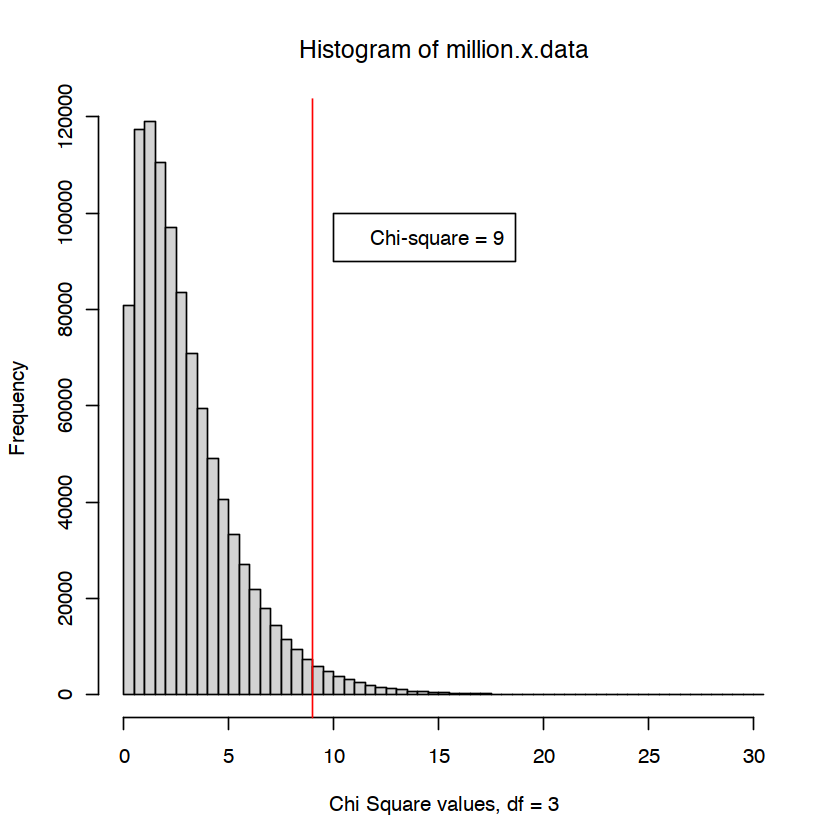

In [22]:
million.x.data<-rchisq(1000000,3)#calculate a million chi squared values
hist(million.x.data,xlab="Chi Square values, df = 3",breaks=50)
#place our observed chi-square value in the figure
abline(v=9,col="red")
legend(10,100000,"Chi-square = 9")

Aha! Observe that most Chi-square values lay between 0 and 5, and our observed value of 9 (marked by a vertical red line) is less likely, but how less likely?

Let's put the limit by signaling the area that contains 95% of chi-squared values, meaning that the so called "rejection area" will be placed to the right of this critical value. This can be done using integrals as the whole probability of all possible values is represented by the total area contained by the bars (the total area represents 100% of the values, this the contain the probability of 1), but we wont get into the maths now, let's just ask R the exact number for us using the function `qchisq()` and let's place it as a vertical green line on the figure:

In [23]:
qchisq(.95,3)#calculate the critical chi square value containing 95% of data with a df = 3

[1] 7.814728

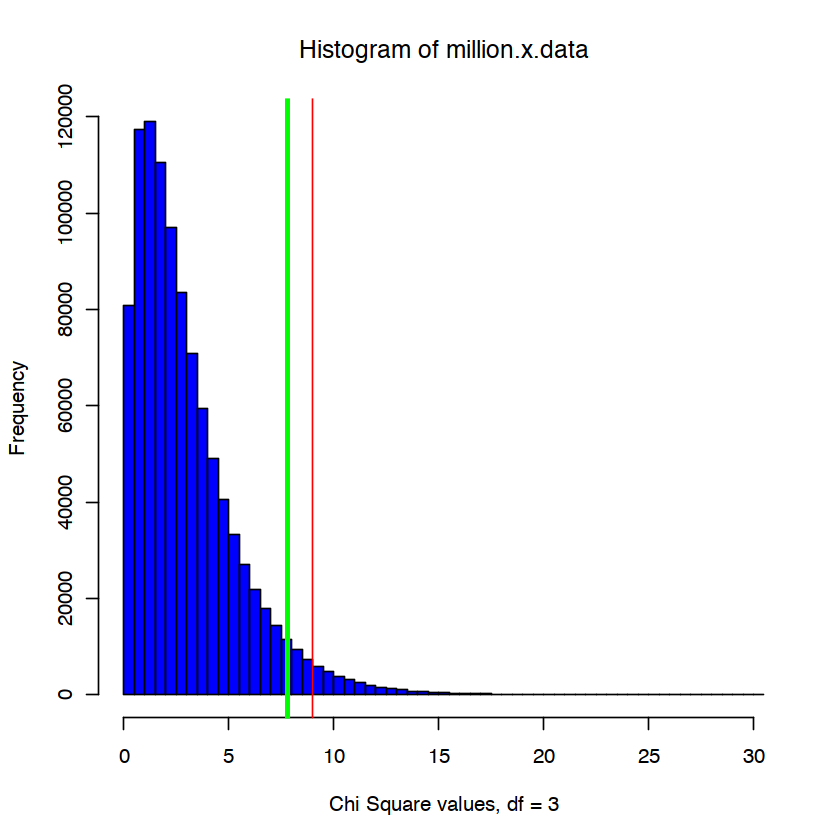

In [67]:
hist(million.x.data,xlab="Chi Square values, df = 3",breaks=50,col="blue")
#less place our observed value in the figure
abline(v=9,col="red")
abline(v=qchisq(.95,3),col="green",lwd=3)

Our observed Chi-squared value marked in red is larger than the critical value marked in green, meaning that the probability of the observed washing nights among the 4 mates is less than 0.05. Thus, our chi-square value of 9 is very unlikely. Instead of a histogram, let's use it a density probability curve signaling the rejection area for further understanding:

In [6]:
RejectionArea<-data.frame(x=seq(0,30,0.1))#give me a sequence of chi square values from 0 to 30 by 0.01
RejectionArea$y <- dchisq(RejectionArea$x,3)#give me the probability for every value
head(RejectionArea)#plot it in a table

,x,y
,<dbl>,<dbl>
1,0.0,0.0000000
2,0.1,0.1200039
3,0.2,0.1614342
4,0.3,0.1880730
5,0.4,0.2065766
6,0.5,0.2196956


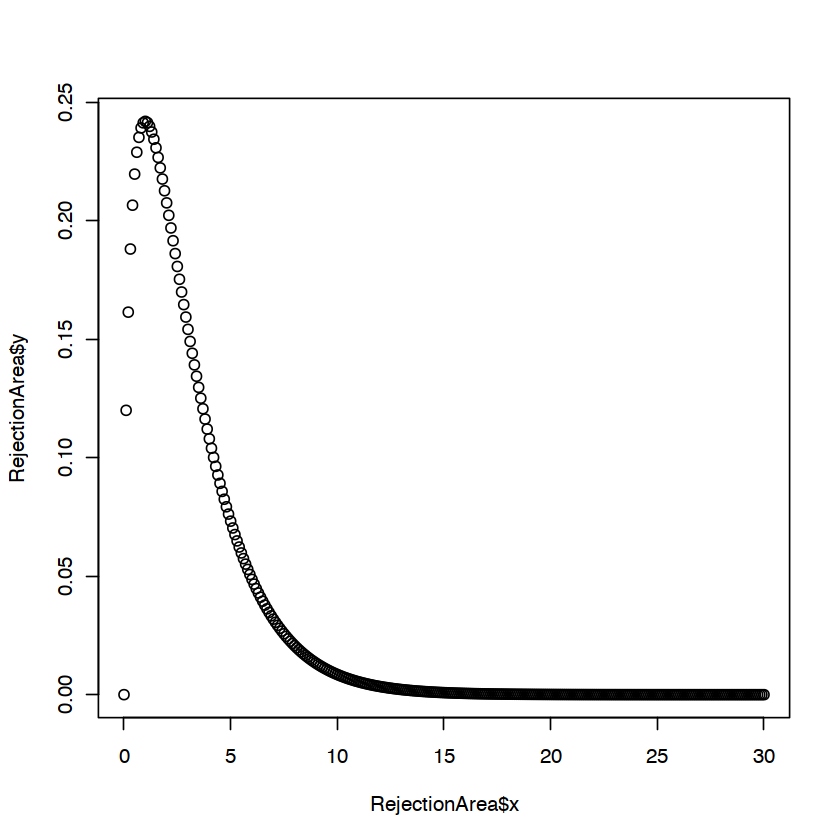

In [7]:
#note that we are doing exactly the same as above
#only that for every chi square value (x) we are calculatin its probability (y)
plot(RejectionArea$x,RejectionArea$y)

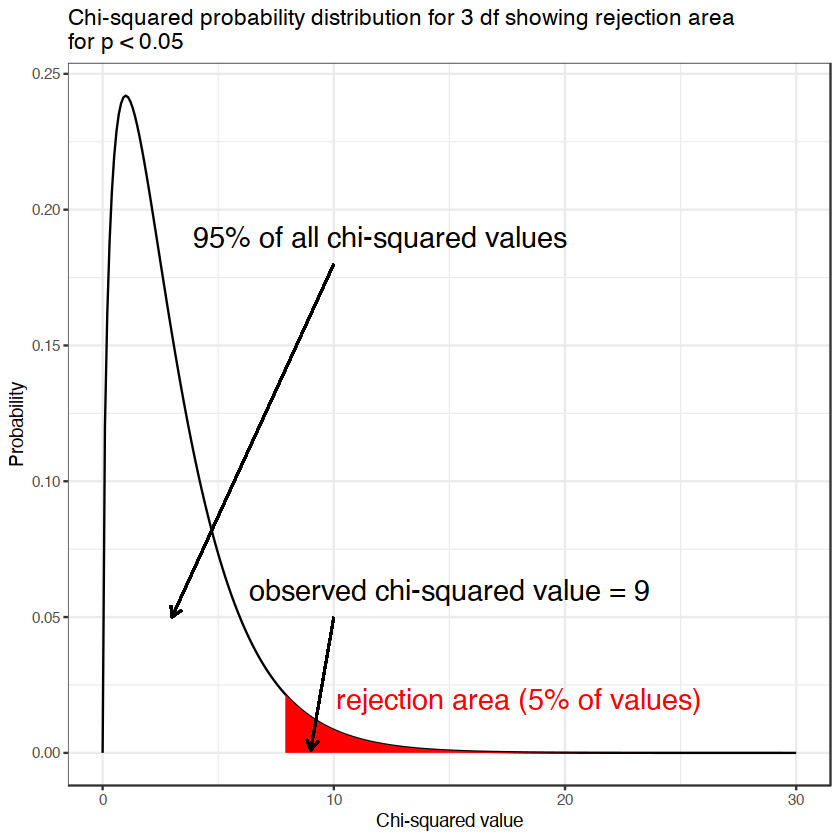

In [8]:
library(ggplot2)#library to build graphics
ggplot(RejectionArea)+geom_path(aes(x,y))+
geom_ribbon(data=RejectionArea[RejectionArea$x>qchisq(0.05,3,lower.tail = F),],aes(x, ymin=0, ymax=y),
            fill="red")+
labs(title="Chi-squared probability distribution for 3 df showing rejection area\nfor p < 0.05",
     x="Chi-squared value",y="Probability")+theme_bw()+
  geom_segment(aes(x = 10, y = 0.05, xend = 9, yend = 0.001),
                 arrow = arrow(length = unit(0.25, "cm")))+
annotate(geom="text", x=15, y=0.060, label="observed chi-squared value = 9",
              color="black",size=6)+
annotate(geom="text", x=18, y=0.02, label="rejection area (5% of values)",
              color="red",size=6)+
annotate(geom="text", x=12, y=0.19, label="95% of all chi-squared values",
              size=6)+
  geom_segment(aes(x = 10, y = 0.18, xend = 3, yend = 0.05),
                 arrow = arrow(length = unit(0.25, "cm")))

If you have understood it so far, I am 99% confident that you already get the basis of statistical analysis far better than the general population. You should be proud of yourself, congratulations. How does it feel to have such an understanding?

<p>
    
<center>
     <img src="https://github.com/norberello/lecture-images-and-clips/blob/main/21-22/supergirl.gif?raw=true" alt="Simply Easy Learning">
</center>

Of course, running the chi-square test on our data using R or any other statistical software saves us a lot of time, in matter of a second you will the answer that would take days to do it by hand. You do not even need to go over all the coding above, as the test is prebuilt in the command `chisq.test()`, which will tell us directly what the exact probability for observed frequencies is: 0.0292. This is, about 3 times out of 100 observed washing frequencies are due to chance:

In [64]:
#run the test again
chisq.test(observed.washes)


	Chi-squared test for given probabilities

data:  observed.washes
X-squared = 9, df = 3, p-value = 0.02929


So, we could state that the observed frequencies significantly differ from what is expected by chance and set between brackets the calculated chi.square value, its degrees of freedom, and indicate that the probability threshold is less than 0.05: 

**The observed washing frequencies differed significantly between friends (Chi-square = 9, df = 3, p < 0.05)**

In this way the scientific community will understand your statistical reasoning. The Chi-square analisis does not end here, and next steps will continue in the following exercises. Here I wanted to highlight how Chi-square analysis works and what is behind it. This reasoning is in essence the same as other statical analyses you will learn, only that depending on the nature of the problem the employed statistic will change (e.g. Student t, z, F, r...). Can you think of a way of testing whether a paper factory produces more smoke at night than during the day? Is it possible to use a chi-square to test it?

<p>
    
<center>
     <img src="https://www.quertime.com/wp-content/uploads/2012/11/factory.gif" alt="Simply Easy Learning" width = 500>
</center>


Once more, remember this **important take away message**: 
    <p>
although statistical thinking gives a powerful clue to equip you in better decision making, it does not warrant what the reality is, this is, whatever low probability we may estimate, Sheldon could still be still be innocent... or guilty. What to do with this piece of statistical information does not belong to the statistics, but it is the qualitative decision of the researcher. For example, on the basis of the result you could suggest 1) making sure than every mate washes the dishes evenly without using sticks so that none can cheat, 2) collecting money to buy a dish washer, 3) punishing Sheldon with doing dishes for a complete month, or 4) calling his mum, but the statistical analysis is not telling you 1), 2) 3), or 4), that is your reasoned choice.
    
<p>
    
<center>
     <img src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fi1156.photobucket.com%2Falbums%2Fp573%2Foff1master%2Fspock.png&f=1&nofb=1" alt="Simply Easy Learning" width = 100>
</center>